In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
# from sklearn.svm import SVC
# from sklearn import model_selection
pd.options.display.max_rows=100
pd.options.display.max_columns=100

In [2]:
melbourne_data=pd.read_csv('melb_data.csv',index_col=0)
melbourne_data.shape

(18396, 21)

In [3]:
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# Exploratory Data Analysis (EDA)

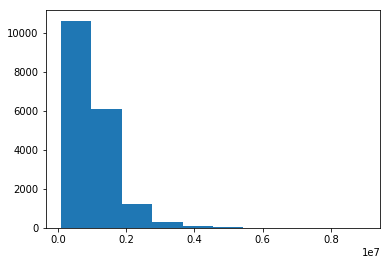

In [4]:
plt.hist(melbourne_data.Price,bins=10);

In [5]:
print('Description of Price ($1m)')
print(melbourne_data.Price.describe()/1000000)

Description of Price ($1m)
count    0.018396
mean     1.056697
std      0.641922
min      0.085000
25%      0.633000
50%      0.880000
75%      1.302000
max      9.000000
Name: Price, dtype: float64


# 1. A Simple Model

In [6]:
melbourne_predictors = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']

df_basic=melbourne_data[melbourne_predictors+['Price']].dropna().copy()
df_basic.shape

(6858, 8)

NOTE: There are over 11,000 records of houses that contain missing information. As a result, df_basic contains clean 6858 rows instead of the 18396 original rows.

In [7]:
df_basic.head()

,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Price
2,2,1.0,156.0,79.0,1900.0,-37.8079,144.9934,1035000.0
4,3,2.0,134.0,150.0,1900.0,-37.8093,144.9944,1465000.0
6,4,1.0,120.0,142.0,2014.0,-37.8072,144.9941,1600000.0
11,3,2.0,245.0,210.0,1910.0,-37.8024,144.9993,1876000.0
14,2,1.0,256.0,107.0,1890.0,-37.8060,144.9954,1636000.0


In [8]:
# Prediction Target
y=df_basic.Price

In [9]:
# Predictors (start with Numerical Features)
X = df_basic[melbourne_predictors]

### Choose a Model

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
# Define model
model = DecisionTreeRegressor(random_state=0)

# Fit model
model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [12]:
print("Making predictions for the following 5 houses:")
print(df_basic[melbourne_predictors+['Price']].head())
print("The predictions are")
print(model.predict(X.head()))

Making predictions for the following 5 houses:
    Rooms  Bathroom  Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude  \
2       2       1.0     156.0          79.0     1900.0   -37.8079    144.9934   
4       3       2.0     134.0         150.0     1900.0   -37.8093    144.9944   
6       4       1.0     120.0         142.0     2014.0   -37.8072    144.9941   
11      3       2.0     245.0         210.0     1910.0   -37.8024    144.9993   
14      2       1.0     256.0         107.0     1890.0   -37.8060    144.9954   

        Price  
2   1035000.0  
4   1465000.0  
6   1600000.0  
11  1876000.0  
14  1636000.0  
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


These predictions appear to be 100% correct but predictions have been made on data that was used to create the model. We need to test the model against new data.

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

predicted_home_prices = model.predict(X)
print("Mean Absolute Error (MAE) =",mean_absolute_error(y, predicted_home_prices))

Mean Absolute Error (MAE) = 392.75298920968214


Furthermore, note that the MAE on this prediction set shown above appears to be extremely (and unrealistically) low.

### Split the data into a training and validation set

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state=0)
# Build and Fit Model
model = DecisionTreeRegressor(random_state=0)
model.fit(train_X, train_y)

# Generate Predictions
val_predictions = model.predict(val_X)
print("Mean Absolute Error (MAE) =",mean_absolute_error(val_y, val_predictions))

Mean Absolute Error (MAE) = 250681.4361516035


After splitting the data into a training and testing set, the magnitude of error seems more realistic given the limited number of features and records used to build the model.

### Personal Functions

Below, I have made a generic function that takes a dataframe and model type along with the option to impute missing values and return the RMSE of the model.

In [87]:
from sklearn.preprocessing import Imputer
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestClassifier
from numpy.core.umath_tests import inner1d

def get_mae(df,impute=False,max_leaf_nodes=None,max_depth=None,n_estimators=100,\
            early_stopping_rounds=None,learning_rate=0.10,\
            tree=DecisionTreeRegressor,rmse=False):
    
    if impute:
        my_imputer = Imputer()
        df = pd.DataFrame(my_imputer.fit_transform(df),columns=df.columns)
    else:
        df=df.dropna()
               
    # Predictors
    X=df.drop('Price',axis=1)
    
    # Prediction Target
    y=df.Price
    
    # Split into training and testing data
    train_X, val_X, train_y, val_y = train_test_split(X, y,random_state=0)
    
    # Build and Fit Model
    if tree == XGBRegressor:
        model = tree(n_estimators=n_estimators,learning_rate=learning_rate,random_state=0)
        model.fit(train_X, train_y, eval_set=[(val_X, val_y)],\
                  early_stopping_rounds=early_stopping_rounds, verbose=False)
    elif tree == GradientBoostingRegressor:
        model = tree(n_estimators=n_estimators,learning_rate=learning_rate,random_state=0)
        model.fit(train_X, train_y)        
    else:
        model = tree(max_leaf_nodes=max_leaf_nodes, max_depth=max_depth, random_state=0)
        model.fit(train_X, train_y)
    
    # Generate Predictions
    val_predictions = model.predict(val_X)
    
    if rmse:
        return np.sqrt(mean_squared_error(val_y, val_predictions))
    else:
        return mean_absolute_error(val_y, val_predictions)

### Choice of Model

Let's start with a simple Deceision Tree Model.<br>
The <b>Decision Tree Regressor</b> is a non-parametric supervised learning model that learns simple decision rules inferred from the data features.<br><br>
NOTE: It is essential to understand the characteristics associated with the model being implemented. The DecisionTreeRegressor has several parameters associated with it, such as max_depth and max_leaf_node, which ultimately determine if the tree is underfit or overfit.

Max leaf nodes: 2  		 Mean Absolute Error:  422068
Max leaf nodes: 5  		 Mean Absolute Error:  336338
Max leaf nodes: 10  		 Mean Absolute Error:  303351
Max leaf nodes: 100  		 Mean Absolute Error:  252517
Max leaf nodes: 200  		 Mean Absolute Error:  247941
Max leaf nodes: 500  		 Mean Absolute Error:  237072
Max leaf nodes: 550  		 Mean Absolute Error:  237240
Max leaf nodes: 1000  		 Mean Absolute Error:  243704
Max leaf nodes: 2000  		 Mean Absolute Error:  251213


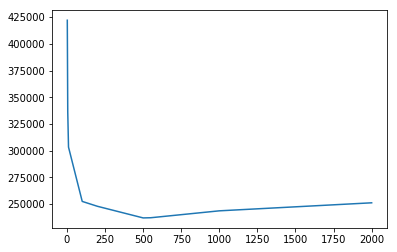

In [17]:
mylist=[]
for max_leaf_nodes in [2,5,10,100,200,500,550,1000,2000]:
    my_mae = get_mae(df_basic,max_leaf_nodes=max_leaf_nodes)
    mylist.append([max_leaf_nodes,my_mae])
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))
plt.plot(*zip(*mylist));

From the above graph we can find the optimal number of maximum leaf nodes.

In [18]:
print("Mean Absolute Error (MAE) =",get_mae(df_basic,max_leaf_nodes=500))

Mean Absolute Error (MAE) = 237072.56627885287


Max Depth: 1  		 Mean Absolute Error:  422068
Max Depth: 2  		 Mean Absolute Error:  357724
Max Depth: 5  		 Mean Absolute Error:  275715
Max Depth: 7  		 Mean Absolute Error:  244533
Max Depth: 8  		 Mean Absolute Error:  241666
Max Depth: 9  		 Mean Absolute Error:  232022
Max Depth: 10  		 Mean Absolute Error:  229104
Max Depth: 11  		 Mean Absolute Error:  231714
Max Depth: 15  		 Mean Absolute Error:  244623
Max Depth: 30  		 Mean Absolute Error:  253159
Max Depth: 60  		 Mean Absolute Error:  250681


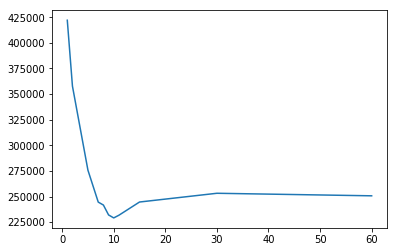

In [19]:
mylist=[]
for max_depth in [1,2,5,7,8,9,10,11,15,30,60]:
    my_mae = get_mae(df_basic,max_depth=max_depth)
    mylist.append([max_depth,my_mae])
    print("Max Depth: %d  \t\t Mean Absolute Error:  %d" %(max_depth, my_mae))
plt.plot(*zip(*mylist));

In [20]:
print("Mean Absolute Error (MAE) =",get_mae(df_basic,max_depth=10))

Mean Absolute Error (MAE) = 229104.1275110839


# 2. A Comprehensive Model - Dealing with Missing Values (Numerical Only)

## Option 1: Remove Missing Data 

In [21]:
df=melbourne_data.copy().select_dtypes(exclude=['object'])
df.shape

(18396, 13)

In [22]:
print('Column Percentage Complete:\n'+str((round(100*df.count()/df.count().max()))))

Column Percentage Complete:
Rooms            100.0
Price            100.0
Distance         100.0
Postcode         100.0
Bedroom2          81.0
Bathroom          81.0
Car               81.0
Landsize          74.0
BuildingArea      42.0
YearBuilt         49.0
Lattitude         82.0
Longtitude        82.0
Propertycount    100.0
dtype: float64


In [23]:
reduced_rows_df = df.dropna(axis=0).copy()
print('Reduced Rows',reduced_rows_df.shape)
reduced_columns_df = df.dropna(axis=1).copy()
print('Reduced Columns',reduced_columns_df.shape)

Reduced Rows (6830, 13)
Reduced Columns (18396, 2)


In [24]:
print("Reduced Rows Mean Absolute Error (MAE) =",get_mae(reduced_rows_df))
print("Reduced Columns Mean Absolute Error (MAE) =",get_mae(reduced_columns_df))

Reduced Rows Mean Absolute Error (MAE) = 249498.07552693208
Reduced Columns Mean Absolute Error (MAE) = 388830.79890510987


As shown above, in the reduced columns dataframe, a significant portion of potentially useful data has been removed from the dataset. Hence, this is probably not the best option to proceed with dealing with missing data, especially given that many of the columns are at least 80% complete.

### A Note On Removing Missing Data

- Removing Randomly Missing Data: Can potentially cause you to lose a large portion of your data.
- Removing Non-Randomly Missing Data: Can potentially introduce biases in your dataset.

## Option 2: Impute Missing Data

sklearn's Preprocessing package contains useful functions and transformer classes to modify the raw dataframe into more appropriate feature vectors. For example, the Imputer class infers missing values from the known part of the data.

With incomplete datasets, the simplest method is to discard entire rows and/or columns containing missing values. However, as shown above, we may lose valuable albeit incomplete data. Thus, by imputing missing values, the valuable data can be retaining in the model building process.

In [25]:
from sklearn.preprocessing import Imputer

In [26]:
df_impute=melbourne_data.select_dtypes(exclude=['object']).copy()
df_impute.shape

(18396, 13)

In [27]:
df_impute.isnull().sum().sort_values(ascending=False)

BuildingArea     10634
YearBuilt         9438
Landsize          4793
Car               3576
Bathroom          3471
Bedroom2          3469
Longtitude        3332
Lattitude         3332
Propertycount        1
Postcode             1
Distance             1
Price                0
Rooms                0
dtype: int64

In [28]:
my_imputer = Imputer()
df_impute=pd.DataFrame(my_imputer.fit_transform(df_impute),columns=df_impute.columns)

In [29]:
print('Number of Missing Values:\n'+str(
    (df_impute.shape[0]-df_impute.count())[(df_impute.shape[0]-df_impute.count())>0]))

Number of Missing Values:
Series([], dtype: int64)


Max leaf nodes: 2  		 Mean Absolute Error:  417969
Max leaf nodes: 5  		 Mean Absolute Error:  358354
Max leaf nodes: 10  		 Mean Absolute Error:  298210
Max leaf nodes: 50  		 Mean Absolute Error:  250026
Max leaf nodes: 100  		 Mean Absolute Error:  240255
Max leaf nodes: 200  		 Mean Absolute Error:  231587
Max leaf nodes: 600  		 Mean Absolute Error:  222986
Max leaf nodes: 650  		 Mean Absolute Error:  222971
Max leaf nodes: 700  		 Mean Absolute Error:  224198
Max leaf nodes: 1000  		 Mean Absolute Error:  224665
Max leaf nodes: 3000  		 Mean Absolute Error:  231262


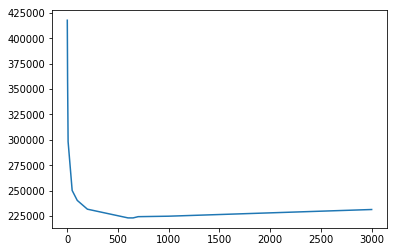

In [30]:
mylist=[]
for max_leaf_nodes in [2,5,10,50,100,200,600,650,700,1000,3000]:
    my_mae = get_mae(df_impute,max_leaf_nodes=max_leaf_nodes)
    mylist.append([max_leaf_nodes,my_mae])
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))
plt.plot(*zip(*mylist));

In [31]:
df=melbourne_data.select_dtypes(exclude=['object']).copy()
print("Mean Absolute Error (MAE) Not Imputed =",get_mae(df,max_leaf_nodes=650))
print("Mean Absolute Error (MAE) Imputed =",get_mae(df,max_leaf_nodes=650,impute=True))

Mean Absolute Error (MAE) Not Imputed = 235742.03550368827
Mean Absolute Error (MAE) Imputed = 222971.72881116258


Using the impute method on non-object features only, there appears to be only a slight improvement when compared to the basic model that dropped rows containing missing data.

### RandomForestRegressor

In [32]:
from sklearn.ensemble import RandomForestRegressor

### Random Forest vs. Decision Tree Regressor

A Random Forest is essentially a collection *ensemble* model of several Decision Trees. The benefits to using a Random Forest over a single Decision Tree is 
- A single Decision Tree would lead to overfitting a model if the dataset is large.
- Using several Decision Trees to interpret the data would lead to a more consistent and fair approach to data recognition.

In [33]:
df=melbourne_data.select_dtypes(exclude=['object']).copy()

Max leaf nodes: 16  		 Mean Absolute Error:  271030
Max leaf nodes: 81  		 Mean Absolute Error:  230739
Max leaf nodes: 256  		 Mean Absolute Error:  210016
Max leaf nodes: 625  		 Mean Absolute Error:  200555
Max leaf nodes: 1296  		 Mean Absolute Error:  196970
Max leaf nodes: 2401  		 Mean Absolute Error:  196170
Max leaf nodes: 4096  		 Mean Absolute Error:  196943
Max leaf nodes: 6561  		 Mean Absolute Error:  196991


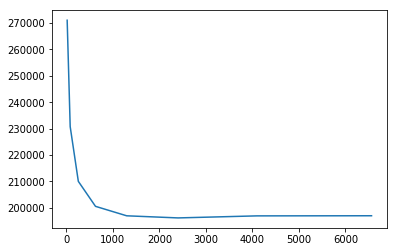

In [34]:
mylist=[]
for max_leaf_nodes in [i**4 for i in range(2,10)]:
    my_mae = get_mae(df,max_leaf_nodes=max_leaf_nodes,tree=RandomForestRegressor,impute=True)
    mylist.append([max_leaf_nodes,my_mae])
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))
plt.plot(*zip(*mylist));

In [35]:
print("Mean Absolute Error (MAE) =",get_mae(df,max_leaf_nodes=2401,tree=RandomForestRegressor,impute=True))

Mean Absolute Error (MAE) = 196170.3637405934


# Dealing with Categorical Data

In [36]:
df = melbourne_data.copy().drop(['Address','CouncilArea'],axis=1).dropna()
df.shape

(6830, 19)

In [37]:
for col in df.columns:
    if df[col].dtypes=='object':
        unique_cat=len(df[col].unique())
        print('Feature {col} has {unique_cat} unique categories'.\
             format(col=col, unique_cat=unique_cat))

Feature Suburb has 300 unique categories
Feature Type has 3 unique categories
Feature Method has 5 unique categories
Feature SellerG has 214 unique categories
Feature Date has 57 unique categories
Feature Regionname has 8 unique categories


Now let's convert the categorical features to numerical in order to be considered in the model building process. We will drop missing data for now and impute it afterwards.

In [38]:
df.select_dtypes(include=['object']).head()

,Suburb,Type,Method,SellerG,Date,Regionname
2,Abbotsford,h,S,Biggin,4/02/2016,Northern Metropolitan
4,Abbotsford,h,SP,Biggin,4/03/2017,Northern Metropolitan
6,Abbotsford,h,VB,Nelson,4/06/2016,Northern Metropolitan
11,Abbotsford,h,S,Nelson,7/05/2016,Northern Metropolitan
14,Abbotsford,h,S,Nelson,8/10/2016,Northern Metropolitan


The pandas method get_dummies simply converts categorical variables into indicator variables. However, it is not practical to create dummies for categorical features that contain many different categories.

In [39]:
def replace_cat(df, tolist):
    for x in tolist:
        dummies=pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x,1)
        df = pd.concat([df,dummies],axis=1)
    return df

In [40]:
tolist=['SellerG','Suburb']

In [41]:
# Gather and Convert Categorical Features Using get_dummies
categorical_training_predictors = pd.get_dummies(df.select_dtypes(include=['object']).copy())

# Gather Numerical Features
numerical_training_predictors = df.select_dtypes(exclude=['object']).drop('Price',axis=1).copy()

In [42]:
# Combine numerical and categorical features
combined_predictors=pd.merge(numerical_training_predictors,categorical_training_predictors,left_index=True, right_index=True)

In [43]:
# Create dataframes with the Price 
numerical_df=pd.merge(numerical_training_predictors,pd.DataFrame(df.Price),left_index=True, right_index=True)
categorical_df=pd.merge(categorical_training_predictors,pd.DataFrame(df.Price),left_index=True, right_index=True)
combined_df=pd.merge(combined_predictors,pd.DataFrame(df.Price),left_index=True, right_index=True)

In [44]:
print('Mean Absolute Error with Only Numerical Features: ' + str(get_mae(numerical_df,tree=RandomForestRegressor)))
print('Mean Absolute Error with Dummy Categorical Features: ' + str(get_mae(categorical_df,tree=RandomForestRegressor)))
print('Mean Absolute Error with Both: ' + str(get_mae(combined_df,tree=RandomForestRegressor)))

Mean Absolute Error with Only Numerical Features: 184240.8058548009
Mean Absolute Error with Dummy Categorical Features: 282755.3791011487
Mean Absolute Error with Both: 179027.04988290402


Max leaf nodes: 16  		 Mean Absolute Error:  255695
Max leaf nodes: 81  		 Mean Absolute Error:  202501
Max leaf nodes: 256  		 Mean Absolute Error:  184108
Max leaf nodes: 625  		 Mean Absolute Error:  180036
Max leaf nodes: 1296  		 Mean Absolute Error:  178213
Max leaf nodes: 2401  		 Mean Absolute Error:  178272
Max leaf nodes: 4096  		 Mean Absolute Error:  178217
Max leaf nodes: 6561  		 Mean Absolute Error:  178217


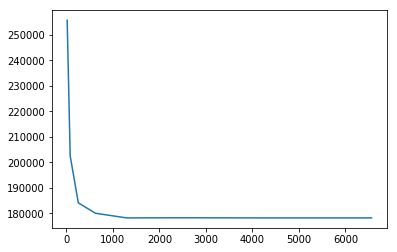

In [45]:
mylist=[]
for max_leaf_nodes in [i**4 for i in range(2,10)]:
    my_mae = get_mae(combined_df,max_leaf_nodes=max_leaf_nodes,tree=RandomForestRegressor)
    mylist.append([max_leaf_nodes,my_mae])
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))
plt.plot(*zip(*mylist));

In [46]:
print("Mean Absolute Error (MAE) =",get_mae(combined_df,max_leaf_nodes=1296,tree=RandomForestRegressor))

Mean Absolute Error (MAE) = 178213.22504251558


Max Depth: 1  		 Mean Absolute Error:  409723
Max Depth: 5  		 Mean Absolute Error:  236759
Max Depth: 9  		 Mean Absolute Error:  189654
Max Depth: 13  		 Mean Absolute Error:  180071
Max Depth: 17  		 Mean Absolute Error:  180784
Max Depth: 21  		 Mean Absolute Error:  180057
Max Depth: 25  		 Mean Absolute Error:  178593
Max Depth: 29  		 Mean Absolute Error:  179633


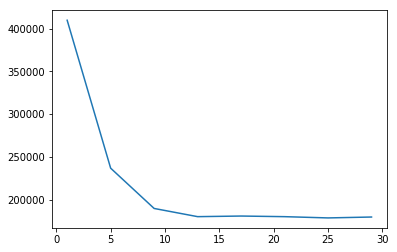

In [47]:
mylist=[]
for max_depth in range(1,30,4):
    my_mae = get_mae(combined_df,max_depth=max_depth,tree=RandomForestRegressor)
    mylist.append([max_depth,my_mae])
    print("Max Depth: %d  \t\t Mean Absolute Error:  %d" %(max_depth, my_mae))
plt.plot(*zip(*mylist));

### Impute Data (With Newly Converted Categorical Data)

In [48]:
df = melbourne_data.copy().drop(['Address','CouncilArea'],axis=1).reset_index().drop('index',axis=1)

In [49]:
# Separate Features
numerical_training_predictors = df.select_dtypes(exclude=['object']).drop('Price',axis=1).copy()
categorical_training_predictors = df.select_dtypes(include=['object']).copy()

# Impute Categorical Features
categorical_training_predictors = categorical_training_predictors.apply(lambda x:x.fillna(x.value_counts().index[0]))
# Convert Categorical Features To Numerical Using get_dummies
categorical_training_predictors = pd.get_dummies(categorical_training_predictors,dummy_na=True)

# Combine numerical and categorical features
combined_predictors=pd.merge(numerical_training_predictors,categorical_training_predictors,left_index=True, right_index=True)

# Create dataframes with the Price 
numerical_df=pd.merge(numerical_training_predictors,pd.DataFrame(df.Price),left_index=True, right_index=True)
categorical_df=pd.merge(categorical_training_predictors,pd.DataFrame(df.Price),left_index=True, right_index=True)
combined_df=pd.merge(combined_predictors,pd.DataFrame(df.Price),left_index=True, right_index=True)

In [50]:
print('Mean Absolute Error with Only Numerical Features (NOT Imputed): ' + str(get_mae(numerical_df,tree=RandomForestRegressor)))
print('Mean Absolute Error with Dummy Categorical Features (NOT Imputed): ' + str(get_mae(categorical_df,tree=RandomForestRegressor)))
print('Mean Absolute Error with Both (NOT Imputed): ' + str(get_mae(combined_df,tree=RandomForestRegressor)))

Mean Absolute Error with Only Numerical Features (NOT Imputed): 184240.8058548009
Mean Absolute Error with Dummy Categorical Features (NOT Imputed): 271600.28514428606
Mean Absolute Error with Both (NOT Imputed): 179946.22997658077


In [51]:
print('Mean Absolute Error with Only Numerical Features (Imputed): ' + str(get_mae(numerical_df,tree=RandomForestRegressor, impute=True)))
print('Mean Absolute Error with Dummy Categorical Features (Imputed): ' + str(get_mae(categorical_df,tree=RandomForestRegressor, impute=True)))
print('Mean Absolute Error with Both (Imputed): ' + str(get_mae(combined_df,tree=RandomForestRegressor, impute=True)))

Mean Absolute Error with Only Numerical Features (Imputed): 197030.4108581902
Mean Absolute Error with Dummy Categorical Features (Imputed): 271600.28514428606
Mean Absolute Error with Both (Imputed): 183445.63366673916


NOTE: We actually notice an increase in MAE when imputing missing values. Previously when we imputed ONLY numerical features, we noticed a small decrease in MAE, however, now with the inclusion of categorical features as well, it is likely that imputation on such a large number of missing values can ultimately create more noise and cause an increase in MAE.

# XGBoost

XGBoost (Extreme Gradient Boosting) iteratively builds multiple tree models while optimizing for a given metric. In contrast to regular Gradient Boosting, XGBoost implements a more regularized model formalization to control over-fitting, giving an overall better performance.

In [52]:
from xgboost import XGBRegressor

### Basic Model

In [53]:
basic_df=melbourne_data.copy().select_dtypes(exclude=['object']).dropna()
get_mae(basic_df,tree=XGBRegressor)

193248.83520564987

### XGBoost Model Features

<b>n_estimators</b> specifies how many times to go through the modeling cycle described above. Range typically lies within 100-1000, however this depends a lot on the learning rate.

n_estimators: 0  		 Mean Absolute Error:  1108480
n_estimators: 1  		 Mean Absolute Error:  1001334
n_estimators: 32  		 Mean Absolute Error:  220109
n_estimators: 243  		 Mean Absolute Error:  183898
n_estimators: 1024  		 Mean Absolute Error:  175658
n_estimators: 3125  		 Mean Absolute Error:  177601


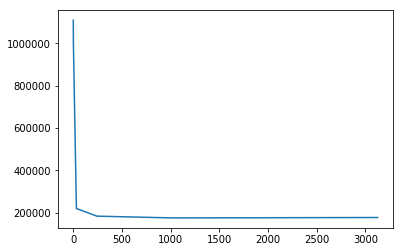

In [54]:
mylist=[]
for n_estimators in [i**5 for i in range(0,6)]:
    mae=get_mae(basic_df,tree=XGBRegressor,n_estimators=n_estimators)
    mylist.append([n_estimators,mae])
    print("n_estimators: %d  \t\t Mean Absolute Error:  %d" %(n_estimators, mae))
plt.plot(*zip(*mylist));

In [55]:
print('Mean Absolute Error (MAE): ' + str(get_mae(basic_df,tree=XGBRegressor,n_estimators=1024)))

Mean Absolute Error (MAE): 175658.2419496487


### Trying XGBoost on a dataframe with both numerical and categorical data.

In [56]:
def convert_cat(df,columns=df.select_dtypes(include=['object']).columns):
    df=df.copy()
    mydict=[]    
    cat_columns=df.select_dtypes(include=['object']).columns
    for i,col in enumerate(cat_columns):
        df[col+'-cat']=df[col].astype('category')
        df[col] = df[col+'-cat'].cat.codes
        mydict.append(dict(enumerate(df[col+'-cat'].cat.categories)))
        df=df.drop([col+'-cat'],axis=1)
    df[cat_columns]=df[cat_columns].applymap(lambda x: float('NaN') if x==-1 else x)
    return df

In [57]:
df = melbourne_data.copy().drop(['Address','CouncilArea'],axis=1)
df.Regionname = df.Regionname.fillna(df.Regionname.value_counts().index[0])
df=convert_cat(df.dropna())
df.shape

(6830, 19)

In [58]:
print('Mean Absolute Error (MAE): ' + str(get_mae(df,tree=XGBRegressor)))

Mean Absolute Error (MAE): 188225.80184243267


n_estimators: 1  		 Mean Absolute Error:  1001334
n_estimators: 32  		 Mean Absolute Error:  214110
n_estimators: 243  		 Mean Absolute Error:  176690
n_estimators: 1024  		 Mean Absolute Error:  166557
n_estimators: 3125  		 Mean Absolute Error:  163481


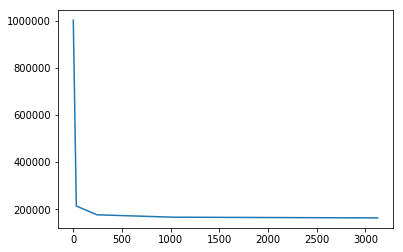

In [59]:
mylist=[]
for n_estimators in [i**5 for i in range(1,6)]:
    mae=get_mae(df,tree=XGBRegressor,n_estimators=n_estimators)
    mylist.append([n_estimators,mae])
    print("n_estimators: %d  \t\t Mean Absolute Error:  %d" %(n_estimators, mae))
plt.plot(*zip(*mylist));

In [60]:
print('Mean Absolute Error (MAE): ' + str(get_mae(df,tree=XGBRegressor,n_estimators=3125)))

Mean Absolute Error (MAE): 163481.21879574063


<b>early_stopping_rounds</b> allows the model to stop iterating when the validation score stops improving. Ideally, you would aim to set a high n_estimators value and balance this with an early_stopping_rounds to find the optimal time to stop iterating.<br>
However, keep in mind that chance can play a role in prematurely finding a precise answer, therefore this feature provides a minimum number of times the model precision can waiver. Typical values for early_stopping_rounds are approximately 5.

NOTE: When using <b>early_stopping_rounds</b>, you need to set aside some of your data for checking the number of rounds to use. If you later want to fit a model with all of your data, set <b>n_estimators</b> to whatever value you found to be optimal when run with early stopping.

early_stopping_rounds: 0.00  		 Mean Absolute Error:  189500
early_stopping_rounds: 0.40  		 Mean Absolute Error:  189500
early_stopping_rounds: 0.80  		 Mean Absolute Error:  189500
early_stopping_rounds: 1.20  		 Mean Absolute Error:  188225
early_stopping_rounds: 1.60  		 Mean Absolute Error:  188225
early_stopping_rounds: 2.00  		 Mean Absolute Error:  188225


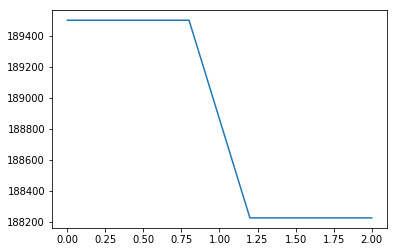

In [61]:
mylist=[]
for early_stopping_rounds in [2.0*i/10 for i in range(0,12,2)]:
    mae=get_mae(df,tree=XGBRegressor,early_stopping_rounds=early_stopping_rounds)
    mylist.append([early_stopping_rounds,mae])
    print("early_stopping_rounds: %.2f  \t\t Mean Absolute Error:  %d" %(early_stopping_rounds, mae))
plt.plot(*zip(*mylist));

In [62]:
print('Mean Absolute Error (MAE): ' + str(get_mae(df,tree=XGBRegressor,n_estimators=3125)))

Mean Absolute Error (MAE): 163481.21879574063


<b>learning_rate</b> is another feature used in XGBoost. It is impletemented to slow down the learning in the XGBoost model by applying a weighting factor to new trees. 
<br>XGBoost sequentially creates and adds trees to the model to correct the residual errors (from existing trees), however this can quickly cause the model to overfit the training sample set. Therefore, the <b>learning_rate</b> feature aims to counteract this negative effect.
<br>Typically, small learning_rate with large n_estimators will yield more accurate XGBoost models, although more iterations will cause the model to take longer to train.

learning_rate: 0.010000  		 Mean Absolute Error:  171244
learning_rate: 0.040000  		 Mean Absolute Error:  164257
learning_rate: 0.090000  		 Mean Absolute Error:  164091
learning_rate: 0.160000  		 Mean Absolute Error:  168531
learning_rate: 0.250000  		 Mean Absolute Error:  173590


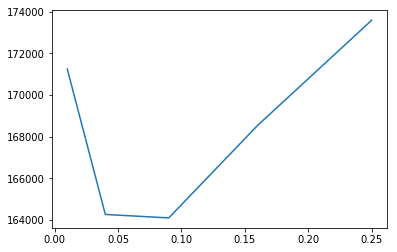

In [63]:
mylist=[]
for learning_rate in [i**2/100 for i in range(1,6)]:
    mae=get_mae(df,tree=XGBRegressor,n_estimators=3125,learning_rate=learning_rate)
    mylist.append([learning_rate,mae])
    print("learning_rate: %f  \t\t Mean Absolute Error:  %d" %(learning_rate, mae))

plt.plot(*zip(*mylist));

NOTE: The optimal learning_rate value in this instance is 0.10, which is also the default value for the XGBRegressor model.

In [64]:
print('Mean Absolute Error (MAE): ' + str(get_mae(
    df,tree=XGBRegressor,n_estimators=3125,
    learning_rate=0.10)))

Mean Absolute Error (MAE): 163481.21879574063


<b>n_jobs</b> is a feature that is used primarily when dealing with larger datasets where runtime is a consideration. Parallelism can be impletemented to build models faster. Typically <b>n_jobs</b> is set to the number of cores on your machine. <b>However</b>, the resulting model won't be particularly more accurate - this is merely a runtime concern.

# Partial Dependence Plots

PDP's are an efficient way to visualize the dependence of a target variable on a set of 'target' features. It can often be overwhelming to visualize ALL the features within a model. Thus, it is preferred to select a few 'important' target features. See below the list of features ranked by importance.<br>
One thing to note is that several methods surrounding plot_partial_dependence are currently limited to Gradient Boosting models only.

In [65]:
df = melbourne_data.copy().drop(['Address','CouncilArea'],axis=1).dropna()
cat_columns=df.select_dtypes(include=['object']).columns
df.Regionname = df.Regionname.fillna(df.Regionname.value_counts().index[0])
df=convert_cat(df.dropna())
df.shape

(6830, 19)

In [66]:
X=df.drop('Price',axis=1)
y=df.Price
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state=0)
# Build and Fit Model
my_model = GradientBoostingRegressor(random_state=0,n_estimators=1024)
my_model.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1024, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [67]:
features=pd.DataFrame([i for i in zip(X.columns,my_model.feature_importances_)],\
             columns=['Feature','Importance']).sort_values('Importance',ascending=False)
features

,Feature,Importance
12,BuildingArea,0.153628
15,Longtitude,0.123105
14,Lattitude,0.112583
11,Landsize,0.096678
6,Distance,0.084799
13,YearBuilt,0.083173
5,Date,0.050477
0,Suburb,0.044932
17,Propertycount,0.040710
7,Postcode,0.039177


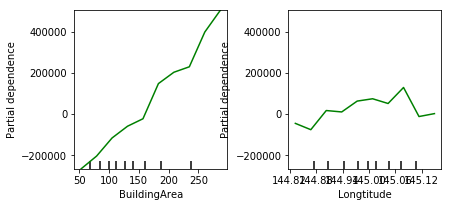

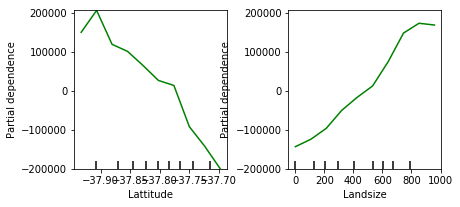

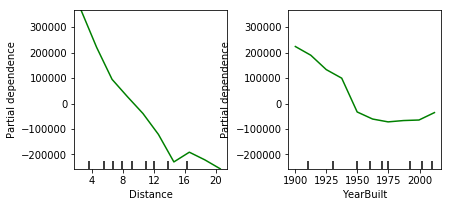

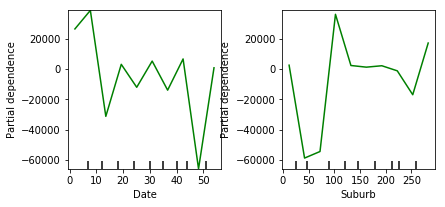

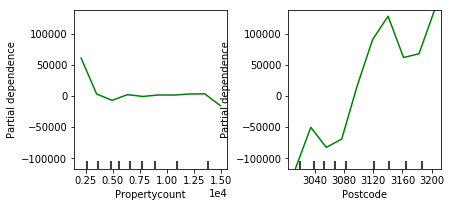

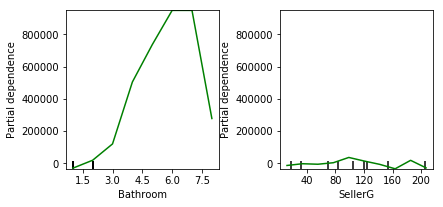

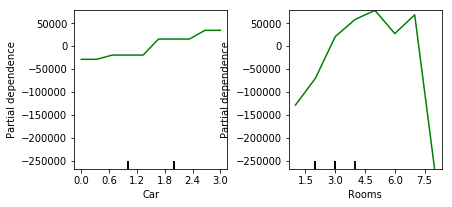

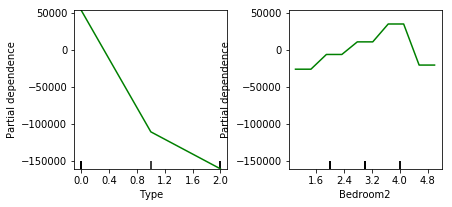

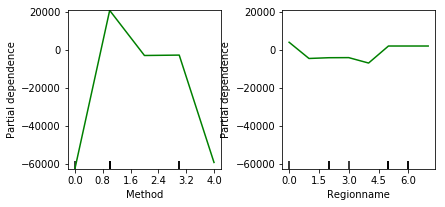

In [68]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

for feat in [i*2 for i in range(features.shape[0]//2)]:
    my_plots = plot_partial_dependence(my_model,       
                                   features=features.index[feat:feat+2], # column numbers of plots we want to show
                                   X=X,            # raw predictors data.
                                   feature_names=features.Feature, # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis


### PDP On Object Features Only

In [69]:
df = melbourne_data.copy().select_dtypes(include=['object']).dropna().drop(['Address','CouncilArea'],axis=1)
df = pd.merge(df,pd.DataFrame(melbourne_data.copy().Price),left_index=True, right_index=True)
df.Regionname = df.Regionname.fillna(df.Regionname.value_counts().index[0])
df=convert_cat(df.dropna())

y = df.Price
X = df.drop(['Price'], axis=1)

my_model = GradientBoostingRegressor(n_estimators=1024,random_state=0)
my_model.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1024, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [70]:
features=pd.DataFrame([i for i in zip(X.columns,my_model.feature_importances_)],\
             columns=['Feature','Importance']).sort_values('Importance',ascending=False)
features

,Feature,Importance
0,Suburb,0.440744
3,SellerG,0.191974
4,Date,0.158327
1,Type,0.103065
2,Method,0.059764
5,Regionname,0.046125


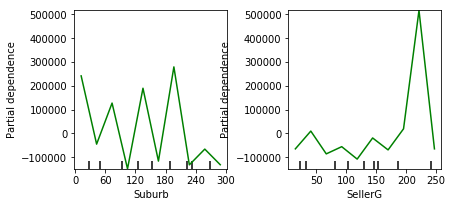

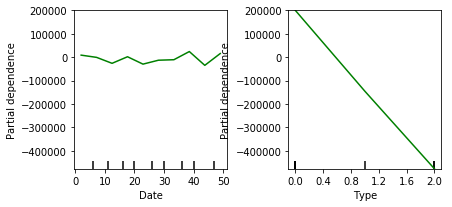

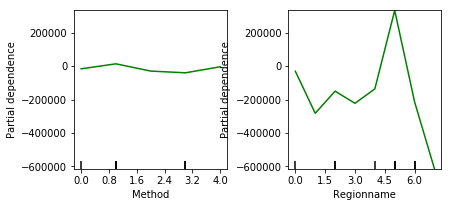

In [71]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

for feat in [i*2 for i in range(features.shape[0]//2)]:
    my_plots = plot_partial_dependence(my_model,       
                                   features=features.index[feat:feat+2], # column numbers of plots we want to show
                                   X=X,            # raw predictors data.
                                   feature_names=features.Feature, # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis


# Pipelines

In [72]:
from sklearn.pipeline import make_pipeline

Pipelines bundles preprocessing and modeling steps, which allows for:
- a simple way to keep your data processing and modeling code organized;
- using an entire whole bundle as one single step..

### Types of Pipeline

1. <b>Transformers</b> are implemented when pre-processing data before modeling e.g. the Imputer class.
2. <b>Models</b> are implemented (after the tranformation) to make predictions.

In [73]:
my_pipeline = make_pipeline(Imputer(), RandomForestRegressor(random_state=0))

In the above pipeline, we have bundle an imputer function and RandomForestRegressor model within one pipeline.<br><br>
### Some Pipeline Methods

<b>decision_function(X)</b>: Apply transforms, and decision_function of the final estimator<br>
<b>fit(X[, y])</b>: Fit the model<br>
<b>fit_predict(X[, y])</b>: Applies fit_predict of last step in pipeline after transforms.<br>
<b>fit_transform(X[, y])</b>: Fit the model and transform with the final estimator<br>
<b>predict(X)</b>: Apply transforms to the data, and predict with the final estimator<br>
<b>score(X[, y, sample_weight])</b>: Apply transforms, and score with the final estimator<br>

In [74]:
df = melbourne_data.copy().drop(['Address','CouncilArea'],axis=1)
df.Regionname = df.Regionname.fillna(df.Regionname.value_counts().index[0])
df=convert_cat(df)
print(df.shape)
y = df.Price
X = df.drop(['Price'], axis=1)
train_X, test_X, train_y, test_y = train_test_split(X, y,random_state=0)

(18396, 19)


In [75]:
my_pipeline.fit(train_X, train_y)
predictions = my_pipeline.predict(test_X)
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 191027.9999855041


In the above code, we can see how a pipeline proves to be a more concise and efficient way to produce code. In contrast, see an alternative method below.

In [76]:
my_imputer = Imputer()
my_model = RandomForestRegressor(random_state=0)

imputed_train_X = my_imputer.fit_transform(train_X)
imputed_test_X = my_imputer.transform(test_X)
my_model.fit(imputed_train_X, train_y)
predictions = my_model.predict(imputed_test_X)
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 191027.9999855041


### Using Pipeline On XGBR

In [77]:
my_pipeline = make_pipeline(Imputer(), XGBRegressor(n_estimators=3125,random_state=0))
my_pipeline.fit(train_X, train_y)
predictions = my_pipeline.predict(test_X)
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 173316.0672233434


In [78]:
get_mae(df,tree=XGBRegressor,impute=True,n_estimators=3125)

172659.7233300123

In [79]:
get_mae(df,tree=XGBRegressor,impute=False,n_estimators=3125)

163496.547744072

# Cross Validation

In [80]:
from sklearn.model_selection import cross_val_score

In [81]:
my_pipeline = make_pipeline(Imputer(), RandomForestRegressor(random_state=0))
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error', cv=5)
print(scores)

[-229787.72815217 -211600.49316843 -199452.22672828 -174166.22902057
 -176638.74466794]


In [82]:
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

Mean Absolute Error 198329.084347


In [83]:
my_pipeline = make_pipeline(Imputer(), XGBRegressor(n_estimators=3125,random_state=0))
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error', cv=5)
print(scores)

[-211818.09203677 -178993.11123628 -182469.04687254 -168537.28010541
 -175826.01840259]


In [84]:
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

Mean Absolute Error 183528.709731


Note: The score computed at each iteration is the score method of the estimator. This can be changed by modifying the scoring parameter. e.g. scoring='adjusted_rand_score'

# Data Leakage

One of the most important concepts surrounding model building is data leakage. This relates to notion that a model - originally appearing as accurate - quickly deteriorates due to a lack of data that was previously available during model building.<br>
In particular, Leaky Predictors and Leaky Validation Strategies are two types of ways data leakage can occur.<br><br>
<b>Leaky Predictors</b> are predictors that contain data that will no longer be available once the model is running. For example, any predictors that change <b><u>after</u></b> the input of other predictors will not be available at the time of prediction making. i.e. <i>"any variable updated (or created) after the target value is realized should be excluded"</i><br><br>
<b>Leaky Validation Strategy</b> highlights the mismanagement of validation data. That is, care has not been taken to distinguish between training and testing data. One important characteristic to look out for is leaky predictors, which frequently have high statistical correlations to the target.
- Ensure to exclude validation data from any fitting, including fitting of preprocessing steps
- In cross-validation methods, ensure that preprocessing takes place inside a pipeline.



In [97]:
df=melbourne_data.select_dtypes(exclude=['object'])
y = df.Price
X = df.drop(['Price'], axis=1)
train_X, test_X, train_y, test_y = train_test_split(X, y,random_state=0)

my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

my_model = RandomForestClassifier(random_state=0)
my_model.fit(train_X, train_y)

predictions = my_model.predict(test_X)
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))
print("Accuracy : " + str(my_model.score(train_X, train_y)))

Mean Absolute Error : 281336.7099369428
Accuracy : 0.8722185982459955


In [93]:
cv_scores

array([0.00885897, 0.01274562, 0.01073105])

In [94]:
my_model.score(train_X, train_y)

0.8722185982459955

In [96]:
my_model = RandomForestClassifier(random_state=0)
my_model.fit(X, y)
my_model.score(X, y)

0.988056810845707

## To Be Continued